### Bussines understanding.
Based on Spotify hits list we would like to check which factors make a music track became a hit.  
We want to answer fallowing questions:
1. Do you have to be famous to make music hit?
2. What musical genres most often become hits?
3. Do any quantitative characteristics help sketch out the typical characteristics of a hit song?
4. is the machine learning algorithm able to predict whether a song will be a hit?


First We need to import all necessary libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


#it's good idea to set bigger plot size at a beging
sns.set(rc = {'figure.figsize':(23,8)})


### Data gathering and cleaning.

Let's upload our data to Pandas DataFrame and have a look on them

In [16]:
df = pd.read_csv('songs_normalize.csv')
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [17]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


### Data cleaning 
Let's check if there. is any missing values in our dataset

In [18]:
# First We need to check if there is any missing values
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

As We can see, Spotify provide us very nice dataset with no emplty values.

Feature 'genre' apears to be important one. It will be a good idea to convert
this categorical feature into a quantitative feature.
Let's have a look at this feature.

In [19]:
# Now let's have a look on genre of our hits
df['genre'].value_counts().head(20)

pop                               428
hip hop, pop                      277
hip hop, pop, R&B                 244
pop, Dance/Electronic             221
pop, R&B                          178
hip hop                           124
hip hop, pop, Dance/Electronic     78
rock                               58
rock, pop                          43
Dance/Electronic                   41
rock, metal                        38
pop, latin                         28
pop, rock                          26
set()                              22
hip hop, Dance/Electronic          16
latin                              15
pop, rock, metal                   14
hip hop, pop, latin                14
pop, rock, Dance/Electronic        13
R&B                                13
Name: genre, dtype: int64

As We can see there is a lot of songs with more than one genre. It would be good idea to split those.

First We need to find out what is a maximum number of genres per song. 

In [20]:
len(df['genre'].str.findall(',').max())

3

So if there is maximum 3 comas than there is maximum 4 genres per song.

In [25]:
genres_title_column =['genre_1','genre_2','genre_3','genre_4']
df[genres_title_column] = df['genre'].str.split(', ',expand=True)

#Let's check how it looks
df[genres_title_column].head(10)

,genre_1,genre_2,genre_3,genre_4
0,pop,None,None,None
1,rock,pop,None,None
2,pop,country,None,None
3,rock,metal,None,None
4,pop,None,None,None
5,hip hop,pop,R&B,None
6,hip hop,None,None,None
7,pop,rock,None,None
8,pop,R&B,None,None
9,Dance/Electronic,None,None,None


In [38]:
# In the meantime we can also add number of spicified genres as another feature.

df['number_of_genre'] = df['genre'].apply(lambda x: x.count(',')+1)

Now we will add each genre of music as a feature. 

In [26]:
# First we need to make a list of unique genres from list
genres_lists =[]
unique_genres = []

for x in genres_title_column:
    genres_lists.append(df[x].unique().tolist())
    
for x in genres_lists:
    for y in x:
        if y not in unique_genres:
            unique_genres.append(y)
unique_genres

['pop',
 'rock',
 'hip hop',
 'Dance/Electronic',
 'metal',
 'R&B',
 'Folk/Acoustic',
 'set()',
 'World/Traditional',
 'latin',
 'country',
 'easy listening',
 None,
 'blues',
 'classical',
 'jazz']

There is two odd values on this list _None_ and _set()_. Without any doubt We can remove _None_.

Let's also have a closer look on _'set()'_

In [27]:
unique_genres.remove(None)

df[df['genre']=='set()'].head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,genre,genre_1,genre_2,genre_3,genre_4
95,Wheatus,Teenage Dirtbag,241666,True,1999,71,0.625,0.850,4,-3.904,...,0.3460,0.000233,0.1740,0.633,94.661,set(),set(),None,None,None
216,Las Ketchup,The Ketchup Song (Aserejé) - Spanglish Version,213973,False,2002,66,0.607,0.923,1,-6.777,...,0.0193,0.000001,0.0924,0.868,184.819,set(),set(),None,None,None
291,Blazin' Squad,Crossroads - Radio Edit,188693,False,2012,40,0.661,0.746,4,-5.153,...,0.1090,0.000000,0.3250,0.502,144.188,set(),set(),None,None,None
428,George Michael,Amazing,265826,False,2004,57,0.805,0.754,10,-6.825,...,0.0884,0.000002,0.1170,0.880,128.429,set(),set(),None,None,None
455,DJ Casper,Cha Cha Slide - Hardino Mix,222146,False,2004,51,0.853,0.911,11,-6.722,...,0.0436,0.005710,0.2870,0.802,131.012,set(),set(),None,None,None


It looks like We can also remove 'set()'
Now We can assign 0 and 1. If song is of a particular genre then we insert 1, if not then we insert 0


In [37]:
# unique_genres.remove('set()')

#First we do iterations through the divided columns of genre(genre_1, genre_2 etc).
#Then we do loops through the list of all genres.

#Assign to each genre value 0
df[unique_genres] = 0

#If the song is of a particular genre then we assign 1
for x in genres_title_column:
    for y in unique_genres:
        df.loc[(df[x] == y),y] = 1 

#Let's check on example
df[['genre','pop','rock']].head(10)       

,genre,pop,rock
0,pop,1,0
1,"rock, pop",1,1
2,"pop, country",1,0
3,"rock, metal",0,1
4,pop,1,0
5,"hip hop, pop, R&B",1,0
6,hip hop,0,0
7,"pop, rock",1,1
8,"pop, R&B",1,0
9,Dance/Electronic,0,0


It look's good, now we can start analyzing our data.

### Data Analyzing

After doing some data preparation now We can analyze our data and try to answer some of our question.

First let's we try to answer first question:
##### 1. Do you have to be famous to make music hit?

In [50]:
# We use value_counts pandas method to count most popular artist

df_artist = df['artist'].value_counts().reset_index()
df_artist.rename(columns={'index':'artist','artist':'number_of_hits'},inplace=True)

df_artist.head(20)

,artist,number_of_hits
0,Rihanna,25
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
5,David Guetta,18
6,Chris Brown,17
7,Kanye West,17
8,Katy Perry,16
9,Beyoncé,16


In [100]:
# We are checking how many artist make just one hit
df_artist[(df_artist['number_of_hits']==1)].sum()

artist            EamonDEVDuffyWill SmithLMCAyo & TeoJ BalvinE-4...
number_of_hits                                                  494
dtype: object

In [53]:
df_artist[(df_artist['number_of_hits']==1)].head(30)

,artist,number_of_hits
341,Michel Teló,1
342,The Streets,1
343,Labrinth,1
344,Reik,1
345,Just Jack,1
346,Jibbs,1
347,Paulo Londra,1
348,OPM,1
349,Jennifer Hudson,1
350,Philip George,1


There is almost 500 artist with one hit during years 2000-2019. 
Among them there is a lot of artist who are rather not known for most of people like Reik, Khia, Tamia etc.

Lets visual Top 10 artist on a chart.

C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


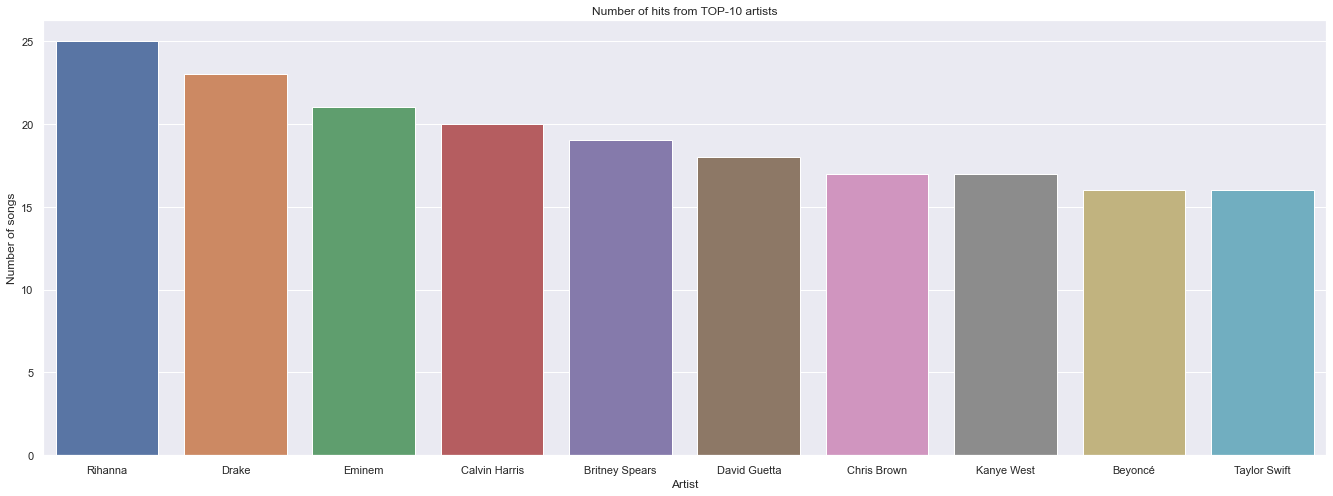

In [11]:
df_artist = df_artist.head(10)
sns.barplot(df_artist['artist'],df_artist['number_of_hits'])
plt.title("Number of hits from TOP-10 artists")
plt.xlabel("Artist")
plt.ylabel("Number of songs")

plt.show()

As we can see on above chart and tables being famous helps to make a hit,  
but there are also many artists who are not very well known and they were able to reach the top of the charts.

#### 2. What musical genres most often become hits?


In [57]:
# We will use data from data preparation step to count number of hits by its genre.

df_genre = df[unique_genres].sum().sort_values(ascending=False).reset_index()
df_genre.rename(columns={'index':'genre','0':'number_of_hits'},inplace=True)
df_genre['number_of_hits'] =df_genre[0]
df_genre.drop(df_genre.columns[1],axis =1,inplace=True)
df_genre

,genre,number_of_hits
0,pop,1633
1,hip hop,778
2,R&B,452
3,Dance/Electronic,390
4,rock,234
5,metal,66
6,latin,64
7,country,21
8,Folk/Acoustic,20
9,World/Traditional,10


As you can see, pop, hip hop and R&B are the most common genres.  

Let's see further how this is represented in percentage terms using piechart

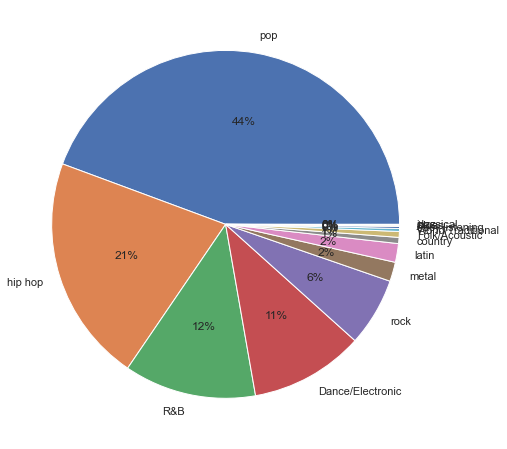

In [47]:
plt.pie(df_genre['number_of_hits'], labels=df_genre['genre'], autopct='%.0f%%')
  
plt.show()

Chart looks unreadable. Let's assign genres that have less than 100 hits a value'other'. This should improve readability

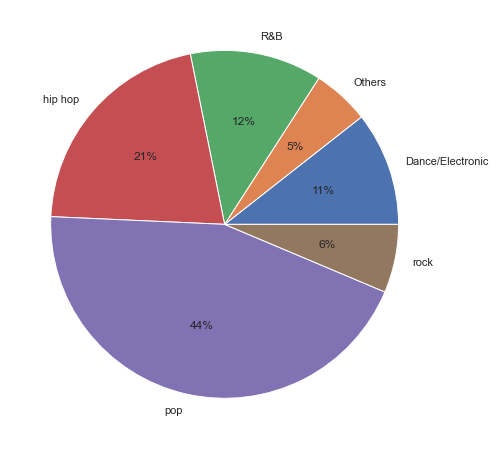

In [58]:
df_genre.loc[df_genre['number_of_hits']<100,'genre']='Others'
df_genre = df_genre.groupby(['genre'])['number_of_hits'].sum()

plt.pie(df_genre.values, labels=df_genre.index, autopct='%.0f%%')
  
plt.show()

The chart shows even more clearly that there are only a few genres that describe the vast majority of hits.

##### 3. Do any quantitative characteristics help sketch out the typical characteristics of a hit song?

###### Danceability
First we will check **danceability** of a track.  
This feature descirbes how good it is to dance to a particular song.  
The more danceable song is the value of this factor is more to 1.

C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


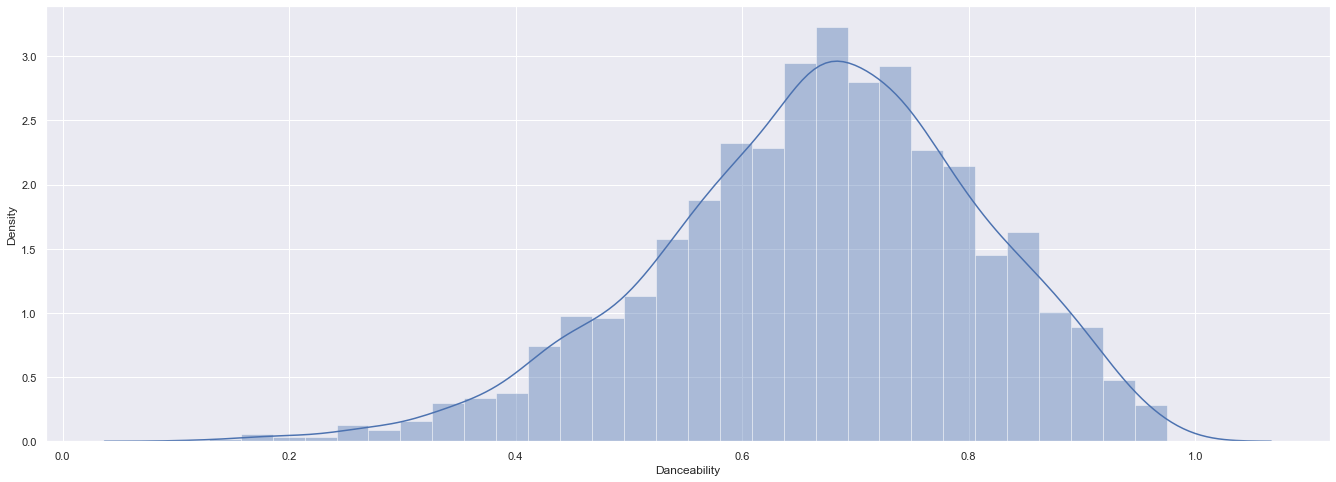

In [60]:
#Histagram will show the distributions of this feature most clearly

sns.distplot(df['danceability'])
plt.xlabel("Danceability")
plt.show()

Not surprisingly, most of the hits have a high level of danceability.  
But it is worth noting that the level of this value is best if it is between 0.6 and 0.8.

##### Liveness

Liveness detects presence of an audience in the track.   
A higher index of this metric indicates a higher probability that the song was recorded live.


C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


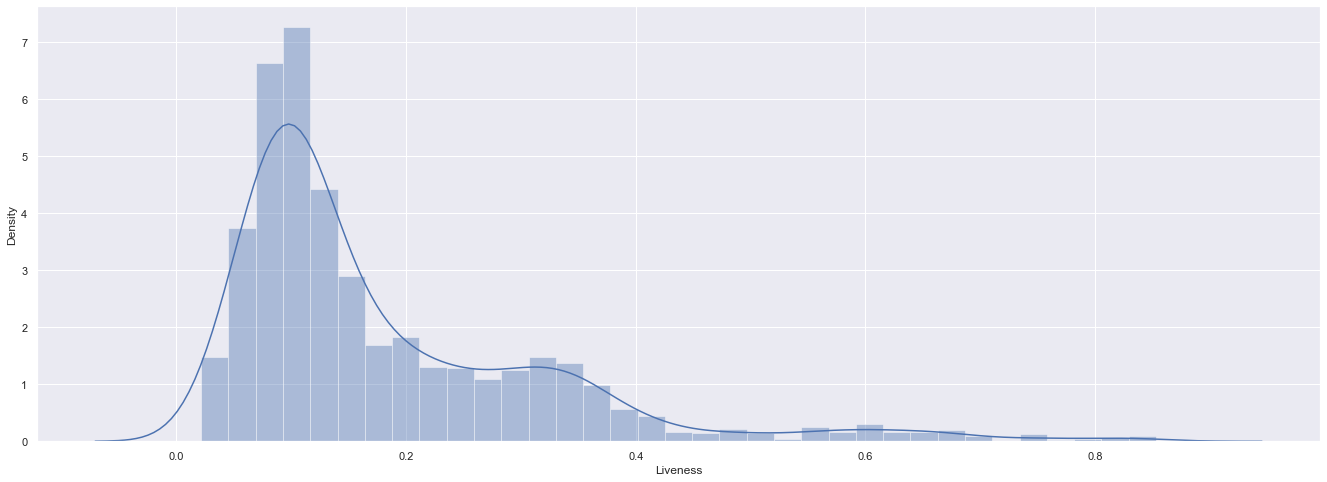

In [61]:
sns.distplot(df['liveness'])
plt.xlabel("Liveness")
plt.show()

As We can see on the chart, if you want to create a hit it’s better not to record it with the audience.

##### Duration

The last question is how long should the song last.

Before looking at duration, let's change the unit from miniseconds to minutes 

In [63]:
# Below function was written based on https://stackoverflow.com/questions/35989666/convert-milliseconds-to-hours-min-and-seconds-python
def millsectomin(millis):
    """"
    converts time duration from milliseconds to minutes and seconds
    
    INPUT:
    millis : duration of time in miliseconds 
    
    OUTPUT :
    duaration of time converted form miliseconds to minuts and seconds format 00:00
    """
    millis = int(millis)
    seconds=(millis/1000)%60
    seconds = int(seconds)
    minutes=(millis/(1000*60))%60
    minutes = int(minutes)
    return "%d:%d" % (minutes, seconds)

df['duration_m_s'] = df['duration_ms'].apply(millsectomin)

df['duration_m_s'] = df['duration_m_s'].str.replace(':','.')
df['duration_m_s']

0       3.31
1       2.47
2       4.10
3       3.44
4       3.20
        ... 
1995     3.1
1996    2.58
1997    3.20
1998    2.51
1999    3.35
Name: duration_m_s, Length: 2000, dtype: object

C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


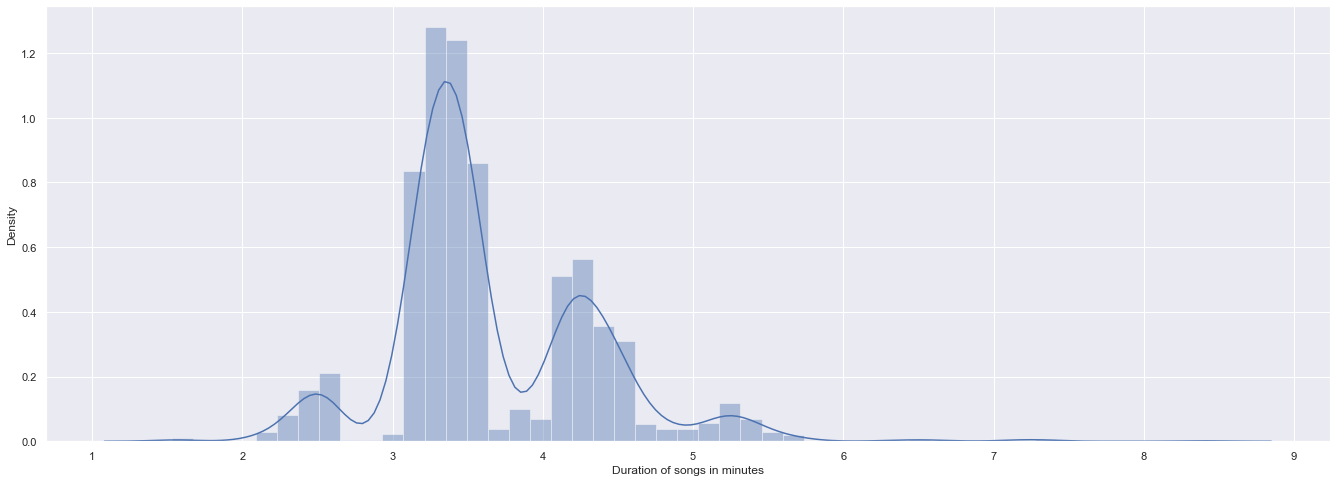

In [112]:
sns.distplot(df['duration_m_s'])
plt.xlabel("Duration of songs in minutes")
plt.show()

Based on our data, the vast majority of hits last between 3 and 3 and a half minutes.